In [6]:
import re #pacchetto per espressioni regolari
import os #pacchetto per muoversi nelle cartelle
import sys
sys.path.append('..')  # Add parent directory to the Python path
from utils.helpers import *


In [7]:
train_path = 'data/training.txt'
test_path = 'data/test.txt'

out_dir = 'data/profiling_input'

In [8]:
split = get_split(test_path)
split

'test'

In [9]:
header = '<doc id="1" genre="journalism" gender="M">'

#doc_id = re.findall(r'genre="(.*?)"', header)[0] # il "?" serve per prendere l'occorrenza più piccola
doc_id = re.search(r'gender="(.*?)"', header).group(1)
doc_id

'M'

In [10]:
doc_id, genre, gender = get_doc_info(header)
doc_id, genre, gender

('1', 'journalism', 'M')

In [11]:
out_file_name = f'{split}#{doc_id}#{genre}#{gender}.txt'
out_file_path = os.path.join(out_dir, out_file_name)
out_file_path

'data/profiling_input\\test#1#journalism#M.txt'

In [12]:
# Necessario eitchettare il blind test

# Read gold.txt file and extract gender values
with open("data/gold.txt", "r") as gold_file:
    gold_data = gold_file.readlines()

# Extract gender labels
gender_list = [line.split()[1].strip() for line in gold_data]

# Read test.txt file
with open("data/test.txt", "r") as test_file:
    test_data = test_file.readlines()

# Replace "?" with gender labels sequentially
updated_test_data = []
gender_index = 0  # Index to track which gender label to use
in_doc = False
for line in test_data:
    if '<doc id="' in line:
        in_doc = True
        if '?' in line:
            label = gender_list[gender_index]
            updated_line = line.replace("?", label)
            gender_index += 1
        else:
            updated_line = line
    elif "</doc>" in line:
        in_doc = False
        updated_line = line
    elif in_doc:
        # If inside a <doc>...</doc> block, continue appending the lines
        updated_line = line.replace("?", label)
    else:
        updated_line = line
    updated_test_data.append(updated_line)

# Write the updated test data to a new file
with open("data/test.txt", "w") as updated_test_file:
    updated_test_file.writelines(updated_test_data)


In [13]:
for file_path in [train_path, test_path]:
    split = get_split(file_path)

    for line in open(file_path, 'r'):
        line = line.strip() # rimuoviamo eventuali spazi e ritorni a capo

        if '<doc id="' in line:    # troviamo un nuovo documento
            doc_id, genre, gender = get_doc_info(line)
            out_file_name = f'{split}#{doc_id}#{genre}#{gender}.txt'
            out_file_path = os.path.join(out_dir, out_file_name)
            user_post = []

        elif '</doc>' in line:     # fine dell'utente
            with open(out_file_path, 'w') as out_file:
                for post in user_post:
                    out_file.write(post)
                    out_file.write('\n')

        elif line != '':  # siamo in corrispondenza del testo di un post
            user_post.append(line)

## Utilizzo dell'output profiling ud

In [126]:
import numpy as np
import csv
profiling_output_path = '/content/profiling_output/11152.csv'


In [127]:
import pandas as pd

df = pd.read_csv(profiling_output_path, sep="\t")

In [128]:
df

,Filename,n_sentences,n_tokens,tokens_per_sent,char_per_tok,ttr_lemma_chunks_100,ttr_lemma_chunks_200,ttr_form_chunks_100,ttr_form_chunks_200,upos_dist_ADJ,...,principal_proposition_dist,subordinate_proposition_dist,subordinate_post,subordinate_pre,avg_subordinate_chain_len,subordinate_dist_1,subordinate_dist_2,subordinate_dist_3,subordinate_dist_4,subordinate_dist_5
0,training#107#journalism#F.conllu,35,769,21.971429,4.761035,0.67,0.640,0.74,0.680,4.811443,...,42.372881,57.627119,91.176471,8.823529,1.360000,72.000000,20.000000,8.000000,0.0,0.0
1,training#97#journalism#M.conllu,62,1189,19.177419,4.541121,0.64,0.520,0.77,0.645,4.793944,...,47.500000,52.500000,76.190476,23.809524,1.122807,87.719298,12.280702,0.000000,0.0,0.0
2,test#80#journalism#M.conllu,33,654,19.818182,4.560345,0.68,0.600,0.78,0.675,5.810398,...,40.000000,60.000000,75.000000,25.000000,1.241379,75.862069,24.137931,0.000000,0.0,0.0
3,test#160#journalism#F.conllu,38,660,17.368421,4.491259,0.72,0.620,0.79,0.695,6.060606,...,51.724138,48.275862,85.714286,14.285714,1.272727,72.727273,27.272727,0.000000,0.0,0.0
4,test#86#journalism#F.conllu,22,519,23.590909,4.615385,0.61,0.525,0.75,0.635,5.973025,...,44.444444,55.555556,68.000000,32.000000,1.190476,80.952381,19.047619,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,test#59#journalism#M.conllu,26,538,20.692308,4.824153,0.67,0.570,0.78,0.665,7.620818,...,43.181818,56.818182,88.000000,12.000000,1.136364,90.909091,4.545455,4.545455,0.0,0.0
396,test#13#journalism#F.conllu,19,479,25.210526,4.413636,0.57,0.510,0.68,0.580,4.175365,...,40.000000,60.000000,100.000000,0.000000,1.250000,75.000000,25.000000,0.000000,0.0,0.0
397,test#10#journalism#F.conllu,40,847,21.175000,4.428958,0.59,0.525,0.72,0.615,4.250295,...,51.515152,48.484848,75.000000,25.000000,1.142857,89.285714,7.142857,3.571429,0.0,0.0
398,training#172#journalism#F.conllu,17,295,17.352941,4.606742,0.67,0.570,0.75,0.680,3.050847,...,43.243243,56.756757,90.476190,9.523810,1.400000,66.666667,26.666667,6.666667,0.0,0.0


In [13]:
# Remove final part before ".conllu" and replace "F" or "M" with just the letter
df['Filename'] = df['Filename'].str.replace(r'F_\d+\.conllu$', 'F.conllu', regex=True).str.replace(r'M_\d+\.conllu$', 'M.conllu', regex=True)

In [14]:
df.to_csv('/content/profiling_output/11137.csv', index=False)

In [129]:
def load_dataset(src_path):
    features_names = None
    documents_info = []
    features = []
    with open(src_path, 'r') as src_file:
        csv_reader = csv.reader(src_file, delimiter='\t')
        for row in csv_reader:
            if features_names is None: # la prima riga del csv contiene 'Filename' e tutti i nomi delle features
                features_names = row[1:]
            else:
                documents_info.append(row[0]) # il primo elemento di ogni riga contiene il nome del file, dove sono codificati lo split e le feature
                features.append(row[1:]) # dal secondo elemento in poi ci sono le features
    return features_names, documents_info, features

In [130]:
features_names, documents_info, features = load_dataset(profiling_output_path)


In [131]:
print(f'Numero features: {len(features_names)}')
print('\nLista features:')
print(features_names[:10])

Numero features: 140

Lista features:
['n_sentences', 'n_tokens', 'tokens_per_sent', 'char_per_tok', 'ttr_lemma_chunks_100', 'ttr_lemma_chunks_200', 'ttr_form_chunks_100', 'ttr_form_chunks_200', 'upos_dist_ADJ', 'upos_dist_ADP']


In [132]:
print('Primo documento:')
print(f'Document info: {documents_info[0]}')
print(f'Features: {features[0][:10]}')

Primo documento:
Document info: training#107#journalism#F.conllu
Features: ['35', '769', '21.97142857142857', '4.76103500761035', '0.67', '0.64', '0.74', '0.68', '4.811443433029909', '15.604681404421326']


In [133]:
document_info = documents_info[0] # consideriamo il primo documento

print('Document info:', document_info)

document_info = document_info[0:-len('.conllu')]
print('Document info senza estensione:', document_info)

splitted_document_info = document_info.split('#')
print('Split su #:', splitted_document_info)

label = splitted_document_info[3]
print('Label:', label)

Document info: training#107#journalism#F.conllu
Document info senza estensione: training#107#journalism#F
Split su #: ['training', '107', 'journalism', 'F']
Label: F


In [134]:
def create_label_list(documents_info):
    labels = []
    for doc_info in documents_info:

        doc_info = doc_info[0:-len('.conllu')]
        splitted_doc_info = doc_info.split('#')

        genre = splitted_doc_info[2]
        gender = splitted_doc_info[3]

        labels.append(gender)
    return labels

In [135]:
labels = create_label_list(documents_info)


In [136]:
labels

['F',
 'M',
 'M',
 'F',
 'F',
 'M',
 'F',
 'F',
 'F',
 'M',
 'F',
 'M',
 'F',
 'F',
 'M',
 'M',
 'M',
 'F',
 'M',
 'F',
 'F',
 'F',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'M',
 'F',
 'M',
 'M',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'M',
 'F',
 'M',
 'F',
 'F',
 'M',
 'F',
 'M',
 'M',
 'M',
 'F',
 'M',
 'M',
 'F',
 'F',
 'M',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'F',
 'M',
 'F',
 'M',
 'M',
 'F',
 'M',
 'M',
 'F',
 'F',
 'M',
 'F',
 'M',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'M',
 'F',
 'M',
 'M',
 'F',
 'M',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'M',
 'F',
 'F',
 'F',
 'M',
 'M',
 'F',
 'M',
 'F',
 'F',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'F',
 'F',
 'M',
 'F',
 'F',
 'M',
 'M',
 'M',
 'F',
 'M',
 'F',
 'M',
 'M',
 'M',
 'F',
 'M',
 'M',
 'F',
 'M',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'F',
 'F',
 'F',
 'F'

In [137]:
len(labels)

400

In [138]:
def train_test_split(documents_info, features, labels):
    train_features, test_features = [], []
    train_labels, test_labels = [], []

    for doc_info, doc_features, doc_label in zip(documents_info, features, labels): # for idx in range(len(documents_info)):
        if 'training' in doc_info:
            train_features.append(doc_features)                                     # train_features.append(documents_info[idx])
            train_labels.append(doc_label)
        else: # if 'test' in file_name
            test_features.append(doc_features)
            test_labels.append(doc_label)

    return train_features, train_labels, test_features, test_labels

In [206]:
train_features, train_labels, test_features, test_labels = train_test_split(documents_info, features, labels)

print('Documenti training set:', len(train_features), len(train_labels))
print('Documenti test set:', len(test_features), len(test_labels))

Documenti training set: 200 200
Documenti test set: 200 200


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)

In [207]:
from sklearn.preprocessing import MinMaxScaler

In [208]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train_features)

In [209]:
from sklearn.svm import LinearSVC

In [210]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

# Define the parameter grid to search through
param_grid = {
    'C': [0.1, 0.01, 0.001, 0.0001],  # Regularization parameter
    'dual': [True, False]
}

# Initialize SVM with linear kernel
svc = LinearSVC()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)

# Fit the grid search to your data
grid_search.fit(X_train, train_labels)

# Get mean test scores across folds
mean_test_scores = grid_search.cv_results_['mean_test_score']

# Print the best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best score found:", grid_search.best_score_)

Best parameters found: {'C': 0.1, 'dual': True}
Best score found: 0.67


In [211]:
X_test = scaler.transform(test_features)

In [212]:
# Get the best estimator (model) found by grid search
best_model = grid_search.best_estimator_

# Now, you can use this best_model to make predictions on new data
# For example, if you have new data X_new, you can predict its labels as follows:
predictions = best_model.predict(X_test)

In [213]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
test_predictions = predictions
print(classification_report(test_labels, test_predictions, zero_division=0)) # output_dict=True

              precision    recall  f1-score   support

           F       0.57      0.59      0.58       100
           M       0.57      0.55      0.56       100

    accuracy                           0.57       200
   macro avg       0.57      0.57      0.57       200
weighted avg       0.57      0.57      0.57       200



In [214]:
print(confusion_matrix(test_labels, test_predictions))

[[59 41]
 [45 55]]


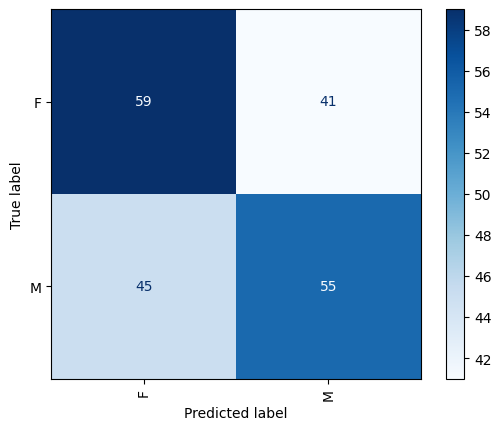

In [215]:
ConfusionMatrixDisplay.from_predictions(test_labels, test_predictions, xticks_rotation='vertical', cmap='Blues');

# Il modello è buono? Vediamo le baseline

In [216]:
from sklearn.dummy import DummyClassifier
baseline_classifier = DummyClassifier(strategy="most_frequent")
baseline_classifier.fit(X_train, train_labels)
baseline_test_predictions = baseline_classifier.predict(X_test)
print(classification_report(test_labels, baseline_test_predictions, zero_division=0))

              precision    recall  f1-score   support

           F       0.50      1.00      0.67       100
           M       0.00      0.00      0.00       100

    accuracy                           0.50       200
   macro avg       0.25      0.50      0.33       200
weighted avg       0.25      0.50      0.33       200



# Kfold 10

In [217]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [218]:
y_train = np.asarray(train_labels)

In [219]:
X_train = scaler.transform(np.asarray(train_features))

In [224]:
splitter = KFold(n_splits=10, random_state=42, shuffle=True)
folds = list(splitter.split(X_train))

for i in range(len(folds)):
    print(len(folds[i][0]), len(folds[i][1]))

180 20
180 20
180 20
180 20
180 20
180 20
180 20
180 20
180 20
180 20


In [225]:
all_y_true = []
all_y_pred = []

# for i, (train_ids, test_ids) in enumerate(splitter.split(X_train)):
for i in range(len(folds)):
    train_ids = folds[i][0]
    test_ids = folds[i][1]


    fold_X_train = X_train[train_ids]
    fold_y_train = y_train[train_ids]

    fold_X_test = X_train[test_ids]
    fold_y_test = y_train[test_ids]

    kfold_svc = LinearSVC(dual=True, C=0.1)
    kfold_svc.fit(fold_X_train, fold_y_train)
    fold_y_pred = kfold_svc.predict(fold_X_test)
    fold_accuracy = accuracy_score(fold_y_test, fold_y_pred)

    all_y_true += fold_y_test.tolist()
    all_y_pred += fold_y_pred.tolist()
    print(f"Accuracy fold {i+1}: {fold_accuracy}")

Accuracy fold 1: 0.5
Accuracy fold 2: 0.7
Accuracy fold 3: 0.7
Accuracy fold 4: 0.75
Accuracy fold 5: 0.65
Accuracy fold 6: 0.6
Accuracy fold 7: 0.4
Accuracy fold 8: 0.7
Accuracy fold 9: 0.65
Accuracy fold 10: 0.55


In [226]:
print(classification_report(all_y_true, all_y_pred, zero_division=0))

              precision    recall  f1-score   support

           F       0.62      0.62      0.62       100
           M       0.62      0.62      0.62       100

    accuracy                           0.62       200
   macro avg       0.62      0.62      0.62       200
weighted avg       0.62      0.62      0.62       200



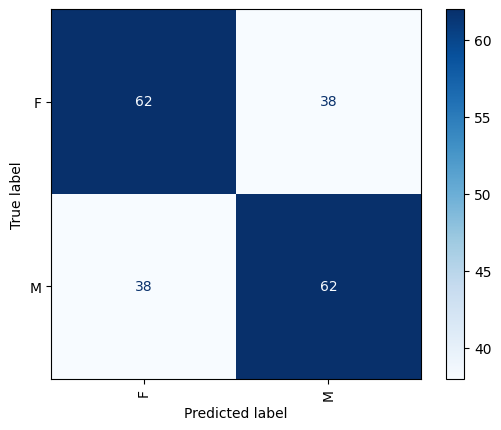

In [227]:
ConfusionMatrixDisplay.from_predictions(all_y_true, all_y_pred, xticks_rotation='vertical', cmap='Blues');

# Prediction scores

In [158]:
test_sample = X_test[50].reshape(1, -1)
print('Predicted class:', svc.predict(test_sample)[0])
print('Scores:')
prediction_scores = [svc.decision_function(test_sample)[0]]  # Wrap the score in a list

# Check if svc.classes_ contains a single class label or an iterable sequence
if isinstance(svc.classes_, np.ndarray):
    classes = svc.classes_
else:
    classes = [svc.classes_]  # Wrap the single class label in a list

for label, score in zip(classes, prediction_scores):
    print(label, score)


Predicted class: F
Scores:
F -0.2129965003746418


In [159]:
svc.classes_

array(['F', 'M'], dtype='<U1')

In [160]:
coefs = svc.coef_ # ndarray of shape (1, n_features) if n_classes == 2 else (n_classes, n_features)
coefs.shape

(1, 140)

Feature importance class F


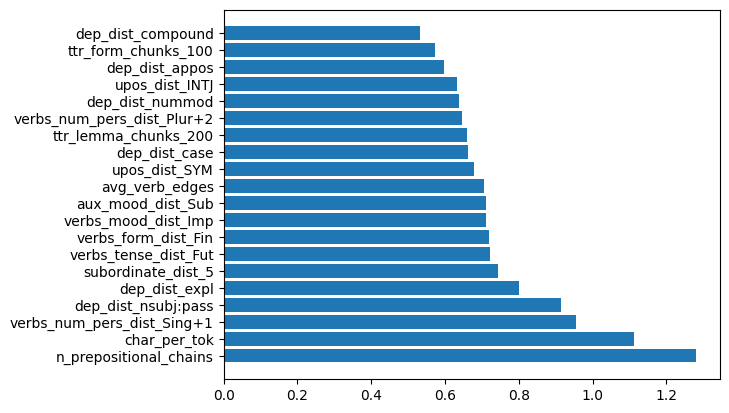

In [161]:
import matplotlib.pyplot as plt

# Assuming `coefs` is your coefficients obtained from the SVM model
# Assuming `features_names` is a list containing the names of your features
idx = 0
class_coefs = coefs[idx]

feature_importances = {feature_name: coef for feature_name, coef in zip(features_names, class_coefs)}
sorted_feature_importances = dict(sorted(feature_importances.items(), key=lambda item: item[1], reverse=True))

num_to_plot = 20
print(f'Feature importance class {svc.classes_[idx]}')
plt.barh(range(num_to_plot), list(sorted_feature_importances.values())[:num_to_plot], align='center')
plt.yticks(range(num_to_plot), list(sorted_feature_importances.keys())[:num_to_plot])
plt.show()


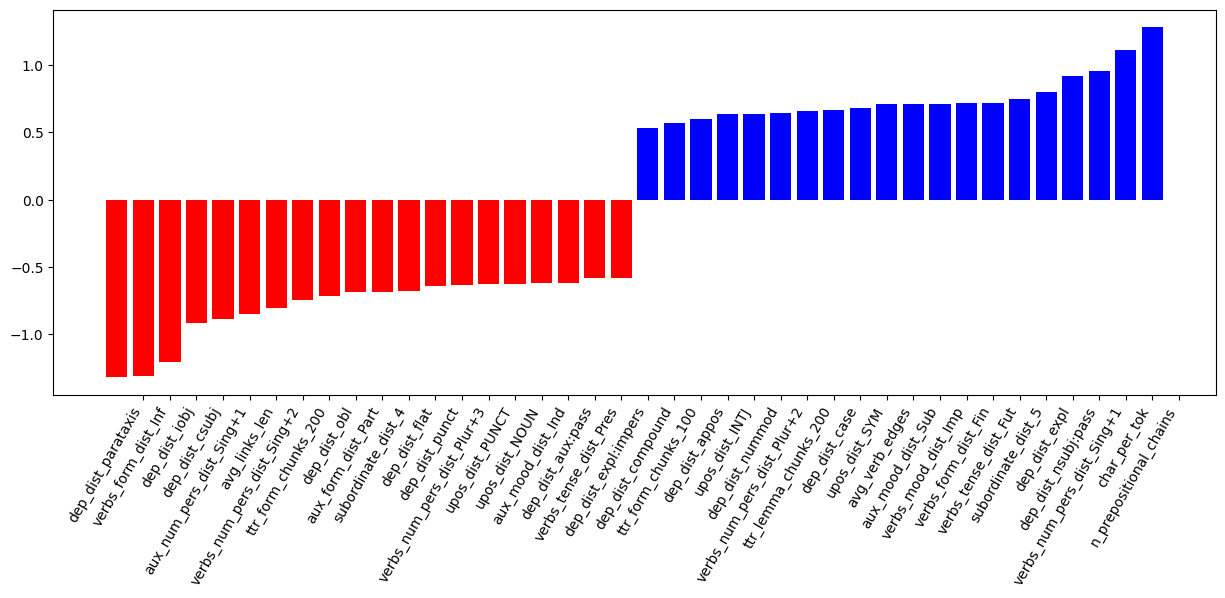

In [162]:
 coef = coefs.ravel()
 top_positive_coefficients = np.argsort(coef)[-20:]
 top_negative_coefficients = np.argsort(coef)[:20]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ["red" if c < 0 else "blue" for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * 20), coef[top_coefficients], color=colors)
 feature_names = np.array(features_names)
 plt.xticks(np.arange(1, 1 + 2 * 20), feature_names[top_coefficients], rotation=60, ha="right")
 plt.show()

Feature importance class F


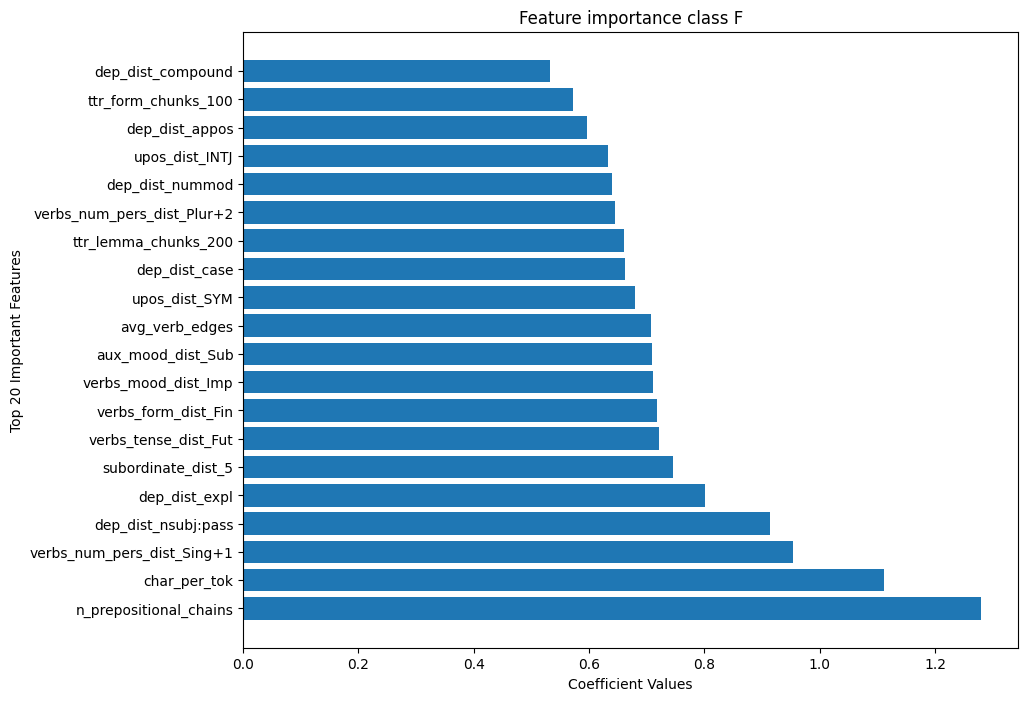

IndexError: index 1 is out of bounds for axis 0 with size 1

In [163]:
import matplotlib.pyplot as plt

# Assuming `coefs` is your coefficients obtained from the SVM model
# Assuming `features_names` is a list containing the names of your features
# Assuming `svc.classes_` contains the class labels 'F' and 'M'
for idx, class_label in enumerate(svc.classes_):
    class_coefs = coefs[idx]

    feature_importances = {feature_name: coef for feature_name, coef in zip(features_names, class_coefs)}
    sorted_feature_importances = dict(sorted(feature_importances.items(), key=lambda item: item[1], reverse=True))

    num_to_plot = 20
    print(f'Feature importance class {class_label}')
    plt.figure(figsize=(10, 8))
    plt.barh(range(num_to_plot), list(sorted_feature_importances.values())[:num_to_plot], align='center')
    plt.yticks(range(num_to_plot), list(sorted_feature_importances.keys())[:num_to_plot])
    plt.title(f'Feature importance class {class_label}')
    plt.xlabel('Coefficient Values')
    plt.ylabel('Top 20 Important Features')
    plt.show()
